<a href="https://colab.research.google.com/github/Gaurav2912/Customer-Segmentation-/blob/main/Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Libraries**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/capstone project/Customer Segmentation/'
# df= pd.read_excel(path + 'Online Retail.xlsx')
df= pd.read_csv(path + 'Online Retail.csv')

In [ ]:
#checking top 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#checking bottom 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
#checking shape of dataset
df.shape

(541909, 8)

## **Data Cleaning**

In [ ]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# checking for unique values
df.nunique().sort_values()

Country           38
Quantity         722
UnitPrice       1630
StockCode       4070
Description     4223
CustomerID      4372
InvoiceDate    23260
InvoiceNo      25900
dtype: int64

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

5268

In [ ]:
# dropping duplicate values
df = df.drop_duplicates()

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

**Checking for null values**

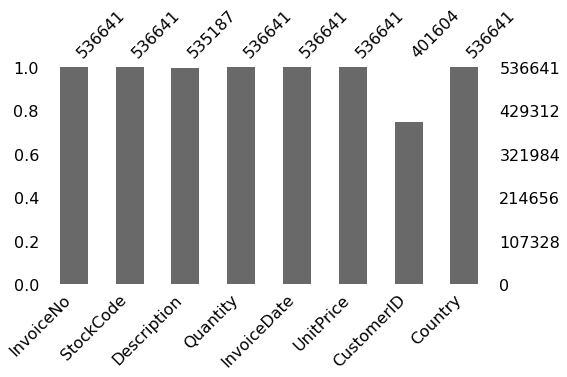

In [ ]:
# Visualize the number of missing
# values as a bar chart
plt.figure()
msno.bar(df, figsize= (8,4));

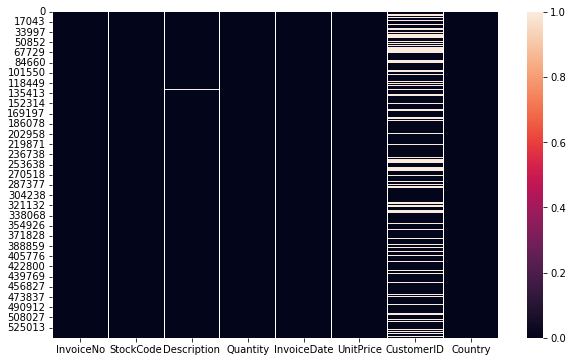

In [ ]:
# Visualize missing values as a matrix
plt.figure(figsize= (10,6))
sns.heatmap(df.isnull());

In [ ]:
# checking for null values in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
# checking for null values in dataset in terms of percentage
100 * df.isnull().sum() / len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

* As we can see that almost 25 percent of the data in Customer ID are missing and Description have only 0.26 percent of missing data.
* If the customer id would be unique for each observation, I would have removed it but it has 4372 unique values, out of 406829 non-null observations, it seems to be the important feature , so I am keeping this column. 
* But for making customer segmenttation these null values should be removed.

In [ ]:
# dropping all  null values
df.dropna(inplace=True)   

In [ ]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

All missing values are gone.

---
Statistical summary 

In [ ]:
# statistical summary of non numerical features dataframe
df.describe(include= np.object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/11 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [ ]:
# statistical summary of numeric features in dataframe
df.describe(percentiles = [.1, .25, .5, .75, .9])

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
10%,1.000000,0.640000,12867.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
90%,24.000000,7.950000,17716.000000
max,80995.000000,38970.000000,18287.000000


* The maximum values in the Quantity and Unit price columns are far from the general trend.
* The minimum value of these feature should be zero, can not be negative.

Let's explore negative values

In [ ]:
df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


* It seems that these negative values correspond to a canceled transaction.

I am selecting only positive values.

In [ ]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
# Let's check all canceled transactions
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


All canceled transactions are also gone.

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
old_num_rows = 541909
new_num_rows = 392692    # df.shape[0]

percent_removal = 100 * (old_num_rows - new_num_rows) / old_num_rows
print(f"After data cleaning {round(percent_removal, 2)} % of rows in dataframe are gone") 

After data cleaning 27.54 % of rows in dataframe are gone


# Feature Engineering

Extract part of date

* Year
* Month
* Day
* Weekday
* Hour


In [ ]:
# Convert it to datetime object
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'])

In [ ]:
def add_dateparts(df, col):
  """
  Extract and create year, month, Day, Weekday and Hour
  """

  df[col + '_year'] = df[col].dt.year
  df[col + '_month'] = df[col].dt.month
  df[col + '_day'] = df[col].dt.day
  df[col + '_weekday'] = df[col].dt.weekday
  df[col + '_hour'] = df[col].dt.hour

add_dateparts(df, 'InvoiceDate')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_weekday,InvoiceDate_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8
